In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import control as ctl

ModuleNotFoundError: No module named 'espectro1D'

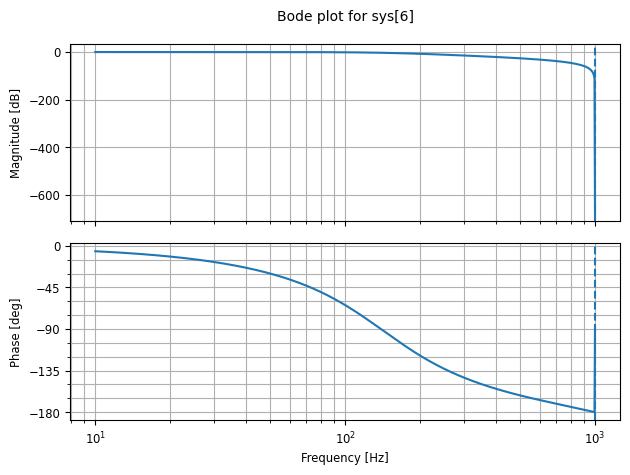

In [5]:
#filtro com signal
#especiicações

fs = 2000

wp = 100
rp = -1

ws = 400
rs =-15

#função para tirar a ordem e freq. corte do filtro, wp e ws são normalizados com fs, ou seja, se wp é em rad/s divide-se for fs em rad/s, mesma coisa para hz. O ganho tem que ser positivo
N,wc = signal.buttord(wp/(fs/2),ws/(fs/2),abs(rp),abs(rs))

#coeficiente do filtro
num,den = signal.butter(N,wc, btype='lowpass') # aqui já sai o filtro digital
Hz = ctl.tf(num, den, 1/fs)

ctl.bode(Hz, Hz = True, dB = True)

f, H = signal.freqz(num, den, worN=2000, fs = fs)


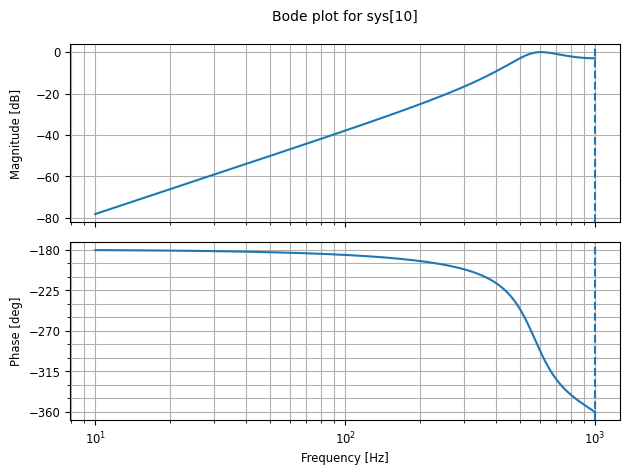

In [7]:
#chebyshev

fs = 2000

wp = 500
rp = -2

ws = 100
rs =-20

#função para tirar a ordem e freq. corte do filtro, wp e ws são normalizados com fs, ou seja, se wp é em rad/s divide-se for fs em rad/s, mesma coisa para hz. O ganho tem que ser positivo
N,wc = signal.cheb1ord(wp/(fs/2),ws/(fs/2),abs(rp),abs(rs))

#coeficiente do filtro
num,den = signal.cheby1(N, 3, wc, btype='highpass')
Hz = ctl.tf(num, den, 1/fs)

ctl.bode(Hz, Hz = True, dB = True)

f, H = signal.freqz(num, den, worN=2000, fs = fs)

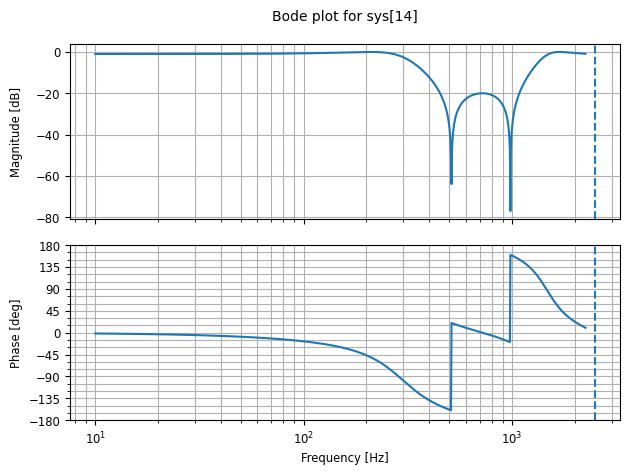

In [13]:
#eliptico

fs = 5000

wp1 = 100
wp2 = 1500
rp = -2

ws1 = 500
ws2 = 1000
rs =-20

#função para tirar a ordem e freq. corte do filtro, wp e ws são normalizados com fs, ou seja, se wp é em rad/s divide-se for fs em rad/s, mesma coisa para hz. O ganho tem que ser positivo
wp = np.array([wp1, wp2])/(fs/2)
ws = np.array([ws1, ws2])/(fs/2)
N,wc = signal.ellipord(wp,ws,abs(rp),abs(rs))

#coeficiente do filtro
num,den = signal.ellip(N, 1, abs(rs), wc, btype='bandstop')
Hz = ctl.tf(num, den, 1/fs)

ctl.bode(Hz, Hz = True, dB = True)

f, H = signal.freqz(num, den, worN=2000, fs = fs)

ATIVIDADE 10

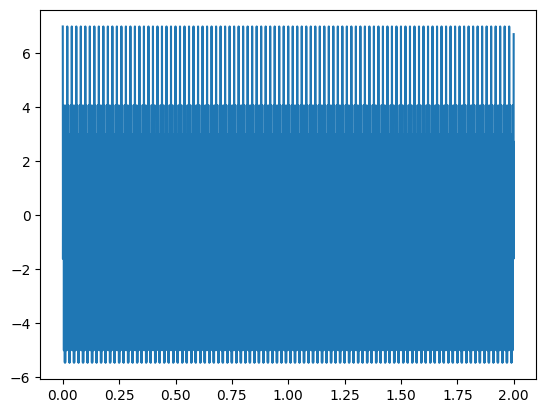

In [28]:
pi = np.pi

fs = 10000
ts = 1/fs

t = np.arange(0, 2, ts)

m = 2*np.cos(2*pi*50*t)+1*np.cos(2*pi*300*t)+2.5*np.cos(2*pi*500*t)+1.5*np.cos(2*pi*700*t)

plt.figure()
plt.plot(t,m)
plt.show()

3
[212.8859708  699.98899167]
<TransferFunction>: sys[59]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.7672 z^6 - 4.449 z^5 + 10.9 z^4 - 14.44 z^3 + 10.9 z^2 - 4.449 z + 0.7672
---------------------------------------------------------------------------
   z^6 - 5.299 z^5 + 11.86 z^4 - 14.35 z^3 + 9.895 z^2 - 3.681 z + 0.577

dt = 0.0001

Ganho em  50 Hz:  0.9896803831323656 ou -0.09010075963469304 dB
Ganho em  300 Hz:  0.0409221562893271 ou -27.760829806194913 dB
Ganho em  500 Hz:  0.04091818922628417 ou -27.76167187184329 dB
Ganho em  700 Hz:  0.9500310194153999 ou -0.4452442870439284 dB


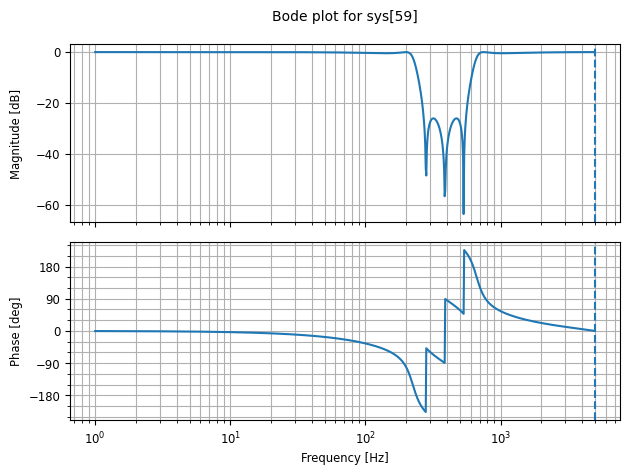

In [46]:
#Filtro eliptico 
#parametros do diagrama

wp1 = 50
wp2 = 700

rp = 0.95

ws1 = 300
ws2 = 500

rs = 0.05

wp = np.array([wp1, wp2])/(fs/2)
ws = np.array([ws1, ws2])/(fs/2)

N, wc = signal.ellipord(wp, ws, abs(20*np.log10(rp)), abs(20*np.log10(rs)) )

print(N)
print(wc*(fs/2))
# filtro de ordem 3
#frequencias de corte em 212,886Hz e 699,989Hz
num1, den1 = signal.ellip(N, abs(20*np.log10(rp)), abs(20*np.log10(rs)), wc, btype = 'bandstop')
Hz = ctl.tf(num1, den1, ts)

ctl.bode(Hz, Hz = True, dB = True)
# criando o filtro

print(Hz)

f = [50, 300, 500, 700]

for f in f:
    K = abs(ctl.evalfr(Hz, np.exp(2*pi*f*1j*ts)))
    print('Ganho em ',f,'Hz: ',K, 'ou', 20*np.log10(K), 'dB')

In [44]:
num, den = ctl.tfdata(Hz)
num = num[0][0]
den = den[0][0]

print('\n')
print(np.real(num[0]))
print(np.real(num[1]))
print(np.real(num[2]))
print(np.real(num[3]))
print(np.real(num[4]))
print(np.real(num[5]))
print(np.real(num[6]))
print('\n')
print(np.real(den[0]))
print(np.real(den[1]))
print(np.real(den[2]))
print(np.real(den[3]))
print(np.real(den[4]))
print(np.real(den[5]))
print(np.real(den[6]))



0.7672368667911463
-4.448934467531508
10.899704478890195
-14.435857147309617
10.899704478890191
-4.448934467531506
0.7672368667911459


1.0
-5.2989658308274175
11.862213116606146
-14.353369667986922
9.89469836489801
-3.6813905835583025
0.5769712098585309


In [51]:
def func (m):
    y = np.zeros(len(m))

    y[0] = 0.7672368667911463*m[0]
    y[1] = 0.7672368667911463*m[1]- 4.448934467531508*m[0]+5.2989658308274175*y[0]
    y[2] = 0.7672368667911463*m[2]- 4.448934467531508*m[1]+10.899704478890195*m[0]+5.2989658308274175*y[1]-11.862213116606146*y[0]
    y[3] = 0.7672368667911463*m[3]- 4.448934467531508*m[2]+10.899704478890195*m[1]-14.435857147309617*m[0]+5.2989658308274175*y[2]-11.862213116606146*y[1]+14.353369667986922*y[0]
    y[4] = 0.7672368667911463*m[4]- 4.448934467531508*m[3]+10.899704478890195*m[2]-14.435857147309617*m[1]+10.899704478890191*m[0]+5.2989658308274175*y[3]-11.862213116606146*y[2]+14.353369667986922*y[1]-9.89469836489801*y[0]
    y[5] = 0.7672368667911463*m[5]- 4.448934467531508*m[4]+10.899704478890195*m[3]-14.435857147309617*m[2]+10.899704478890191*m[1]-4.448934467531506*m[0]+5.2989658308274175*y[4]-11.862213116606146*y[3]+14.353369667986922*y[2]-9.89469836489801*y[1]+3.6813905835583025*y[0]

    for k in range(6, len(m)):
        y[k]=0.7672368667911463*m[k]-4.448934467531508*m[k-1]+10.899704478890195*m[k-2]-14.435857147309617*m[k-3]+10.899704478890191*m[k-4]-4.448934467531506*m[k-5]+0.7672368667911459*m[k-6]+5.2989658308274175*y[k-1]-11.862213116606146*y[k-2]+14.353369667986922*y[k-3]-9.89469836489801*y[k-4]+3.6813905835583025*y[k-5]-0.5769712098585309*y[k-6]

    return y


[-12.61639143+0.j         -12.61632548+0.04375018j
 -12.61612761+0.08749993j ... -12.61579783-0.1312488j
 -12.61612761-0.08749993j -12.61632548-0.04375018j]


<StemContainer object of 3 artists>

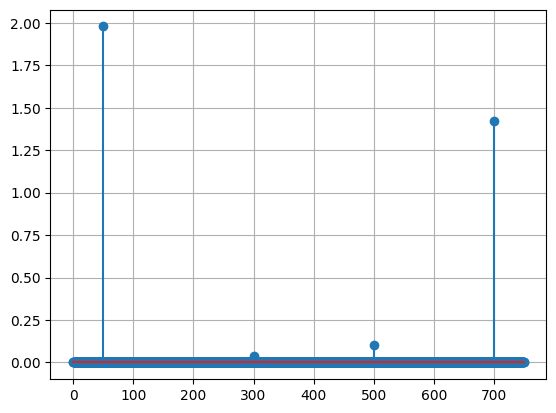

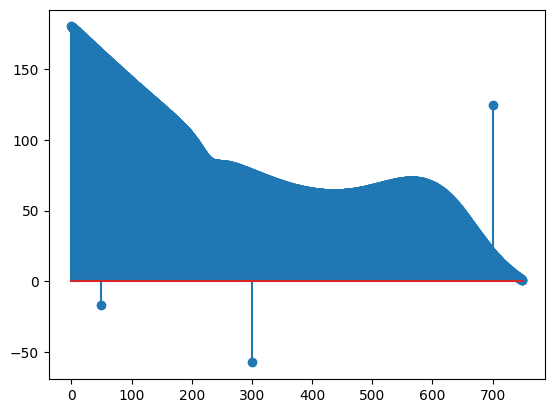

In [72]:
r = func(m)

N = len(r)
S = np.fft.fft(r)
print(S)
df = fs/N
f = np.arange(0, fs, df)



plt.figure()
plt.clf()
plt.stem(f[0:1500], 2*abs(S[0:1500])/N)
plt.grid()

plt.figure()
Fase = (np.angle( S[0:int(np.floor(N/2))] ) )*180/pi
plt.stem( f[0:1500], Fase[0:1500])


In [76]:
# em 50 hz

print(len(f))

i = (N/fs)
print(i)

print('Em 50 Hz: ', (2*abs(S[100])/N), 'ou', ((2*abs(S[100])/N)/2)*100, '% da amplitude original')
print('Em 300 Hz: ', 2*abs(S[600])/N, 'ou', ((2*abs(S[600])/N)/1)*100, '% da amplitude original')
print('Em 500 Hz: ', 2*abs(S[1000])/N, 'ou', ((2*abs(S[1000])/N)/2.5)*100, '% da amplitude original')
print('Em 700 Hz: ', 2*abs(S[1400])/N, 'ou', ((2*abs(S[1400])/N)/1.5)*100, '% da amplitude original')

20000
2.0
Em 50 Hz:  1.978091056792927 ou 98.90455283964636 % da amplitude original
Em 300 Hz:  0.04015492240349537 ou 4.015492240349537 % da amplitude original
Em 500 Hz:  0.10329582899395684 ou 4.131833159758274 % da amplitude original
Em 700 Hz:  1.4244072501272933 ou 94.96048334181955 % da amplitude original
